In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)


In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
recentDate = session.query(measure.date).order_by(measure.date.desc()).first()
print(recentDate)
# Calculate the date one year from the last date in data set.
oneyear = dt.date(2017,8,23) - dt.timedelta(days=365)
print(oneyear)

('2017-08-23',)
2016-08-23


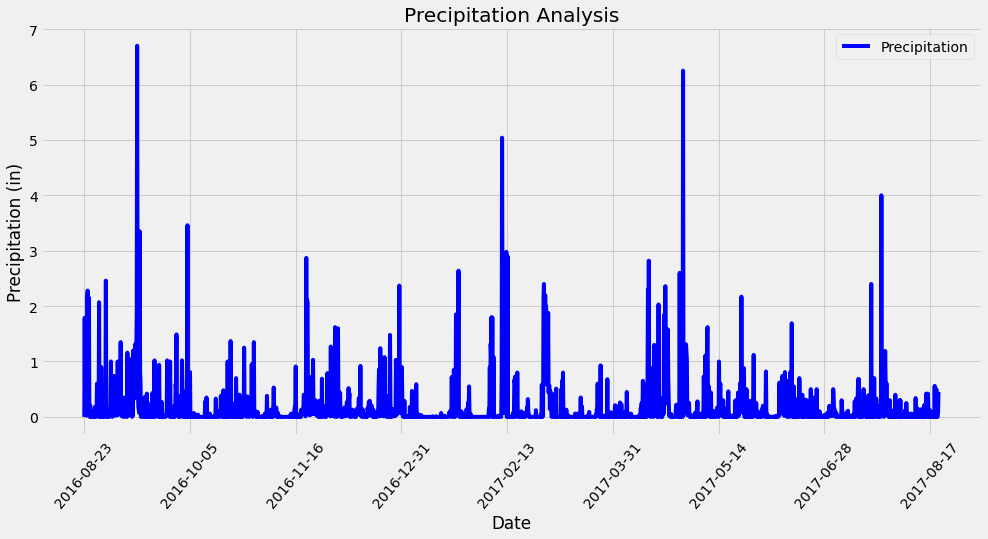

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Perform a query to retrieve the data and precipitation scores
queryData = session.query(measure.date, measure.prcp).filter(measure.date >= oneyear).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
col = ['Date','Precipitation']
precip_df = pd.DataFrame(queryData, columns = col).set_index('Date')
    # precip_df.head()

# Sort the dataframe by date
clean_df = precip_df.sort_values(['Date'])
    # clean_df.head()
clean_df = clean_df.dropna(how='any')
    # clean_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
clean_df.plot(rot=50, figsize=(15,7),color="b")
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.show()


In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station.id).count()
stations

9

In [46]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activeStations = session.query(measure.station,func.count(measure.station)).group_by(measure.station).order_by(func.count(measure.station).desc()).all()
# activeStations
colz = ['Station', 'Count']
active_df = pd.DataFrame(activeStations, columns = colz)
active_df

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostActive_ID = 'USC00519281'
mostActive = session.query(func.min(measure.tobs), func.max(measure.tobs), func.avg(measure.tobs)).filter(measure.station==mostActive_ID).all()
print(f"Max, Min, Avg for Station {mostActive_ID}: {mostActive}")

Max, Min, Avg for Station USC00519281: [(54.0, 85.0, 71.66378066378067)]


Text(0, 0.5, 'Frequency')

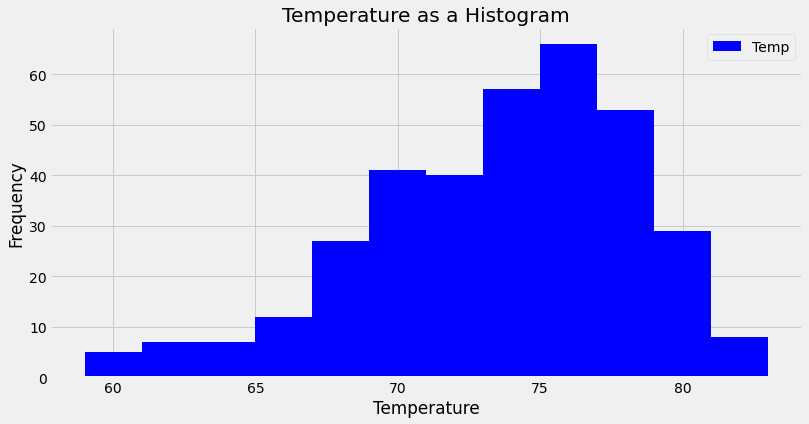

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
queryData2 = session.query(measure.date, measure.tobs).filter(measure.station==mostActive_ID).filter(measure.date >= oneyear).all()
column = ['Date','Temp']
temp_df = pd.DataFrame(queryData2,columns=column)
# temp_df.head()
temp_df.plot.hist(bins=12, color="b", figsize=(12,6))
plt.title("Temperature as a Histogram")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [57]:
# Close Session
session.close()